In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [3]:
df = pd.read_csv("clickbait_data.csv")

In [4]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [5]:
len(df["headline"][0].split(" "))

4

In [6]:
# Distribuzione delle parole 
def analizza_distribuzione_parole(df, colonna):
    # Unisci tutti i testi in una singola stringa
    tutto_il_testo = ' '.join(df[colonna].dropna().astype(str))
    # Dividi in parole usando split(" ")
    parole = tutto_il_testo.split(" ")
    # Rimuovi gli elementi vuoti che potrebbero derivare da spazi multipli
    parole = [parola for parola in parole if parola != '']
    # Opzionalmente converti in minuscolo
    parole = [parola.lower() for parola in parole]
    # Conta la frequenza delle parole
    conteggio = Counter(parole)
    # Ottieni le N parole più comuni
    N = 20
    parole_comuni = conteggio.most_common(N)
    # Crea un dataframe per la visualizzazione
    df_freq = pd.DataFrame(parole_comuni, columns=['Parola', 'Frequenza'])
    
    # Crea un grafico
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequenza', y='Parola', data=df_freq)
    plt.title(f'Top {N} parole più frequenti in {colonna}')
    plt.show()
    
    return df_freq, conteggio

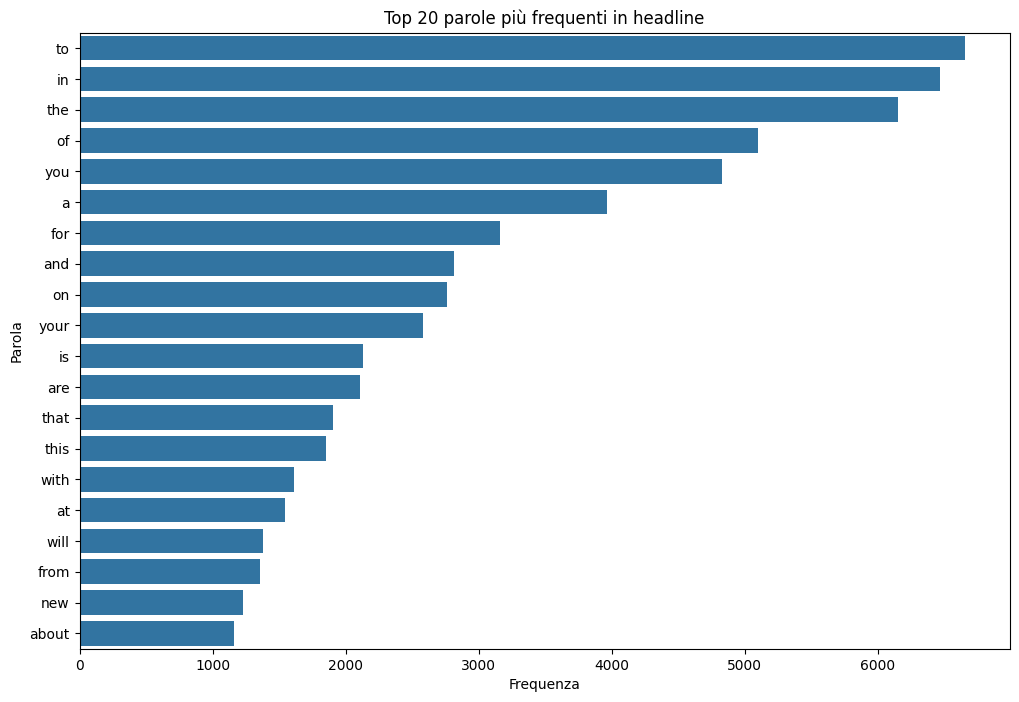

Distribuzione parole nelle headline:
   Parola  Frequenza
0      to       6656
1      in       6466
2     the       6149
3      of       5100
4     you       4828
5       a       3961
6     for       3163
7     and       2814
8      on       2759
9    your       2578
10     is       2128
11    are       2110
12   that       1904
13   this       1851
14   with       1609
15     at       1542
16   will       1382
17   from       1357
18    new       1226
19  about       1158


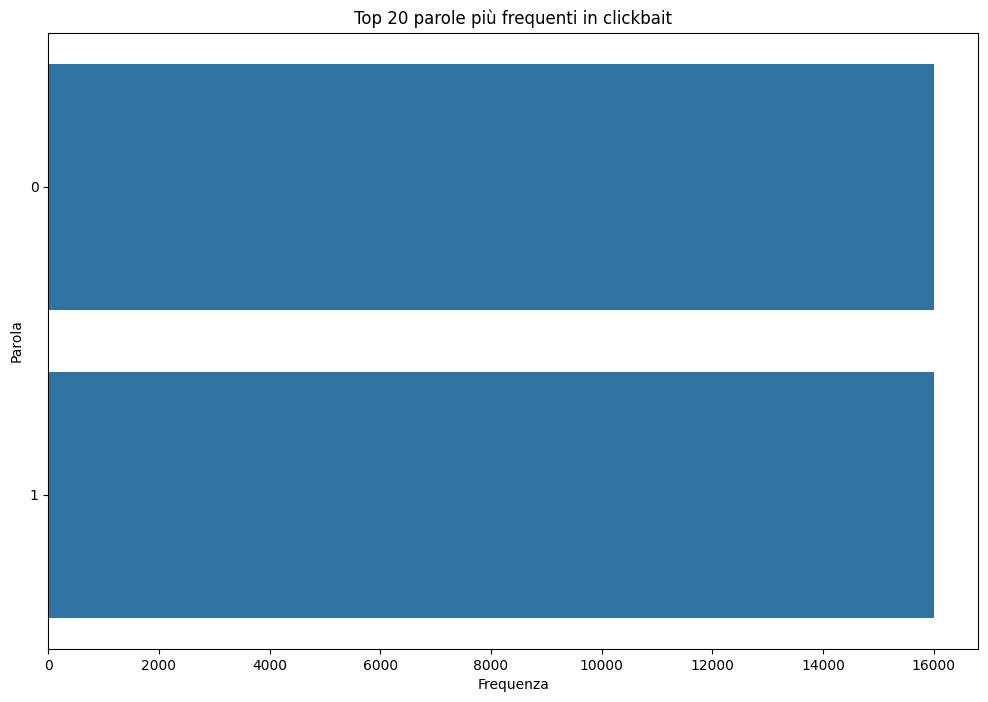

Distribuzione parole nei clickbait:
  Parola  Frequenza
0      0      16001
1      1      15999
Numero totale di parole nelle headline: 290085
Numero totale di parole nei clickbait: 32000
Numero di parole uniche nelle headline: 30340
Numero di parole uniche nei clickbait: 2


In [7]:
freq_headline, conteggio_headline = analizza_distribuzione_parole(df, 'headline')
print("Distribuzione parole nelle headline:")
print(freq_headline)

# Analizza la distribuzione per clickbait
freq_clickbait, conteggio_clickbait = analizza_distribuzione_parole(df, 'clickbait')
print("Distribuzione parole nei clickbait:")
print(freq_clickbait)

# Per vedere il numero totale di parole in ciascuna categoria
print(f"Numero totale di parole nelle headline: {sum(conteggio_headline.values())}")
print(f"Numero totale di parole nei clickbait: {sum(conteggio_clickbait.values())}")
print(f"Numero di parole uniche nelle headline: {len(conteggio_headline)}")
print(f"Numero di parole uniche nei clickbait: {len(conteggio_clickbait)}")

In [8]:
def filtra_per_numero_parole(df, colonna, num_parole, operatore='='):
    """
    Filtra il dataframe mantenendo solo le righe dove il numero di parole
    nella colonna specificata soddisfa la condizione.
    
    Parametri:
    - df: Il dataframe pandas
    - colonna: Nome della colonna da esaminare
    - num_parole: Numero di parole da confrontare
    - operatore: '=' (esattamente x parole), '>' (più di x parole), 
                 '<' (meno di x parole), '>=' (almeno x parole), 
                 '<=' (al massimo x parole)
    
    Ritorna:
    - DataFrame filtrato
    """
    # Funzione per contare le parole
    def conta_parole(testo):
        if pd.isna(testo):
            return 0
        return len(str(testo).split(" "))
    
    # Aggiungi temporaneamente una colonna con il conteggio delle parole
    df_temp = df.copy()
    df_temp['conteggio_parole'] = df_temp[colonna].apply(conta_parole)
    
    # Filtra in base all'operatore
    if operatore == '=':
        df_filtrato = df_temp[df_temp['conteggio_parole'] == num_parole]
    elif operatore == '>':
        df_filtrato = df_temp[df_temp['conteggio_parole'] > num_parole]
    elif operatore == '<':
        df_filtrato = df_temp[df_temp['conteggio_parole'] < num_parole]
    elif operatore == '>=':
        df_filtrato = df_temp[df_temp['conteggio_parole'] >= num_parole]
    elif operatore == '<=':
        df_filtrato = df_temp[df_temp['conteggio_parole'] <= num_parole]
    else:
        raise ValueError("Operatore non valido. Usa '=', '>', '<', '>=', o '<='.")
    
    # Rimuovi la colonna temporanea
    df_filtrato = df_filtrato.drop('conteggio_parole', axis=1)
    
    return df_filtrato

In [9]:
df.columns

Index(['headline', 'clickbait'], dtype='object')

In [10]:
df_filtered = filtra_per_numero_parole(df,"headline",5)

In [11]:
df_filtered

,headline,clickbait
13,Does Coffee Make You Poop,1
38,23 Flaws Every Sneakerhead Has,1
42,The 22 Best Adele Memes,1
46,Guys Try Pinterest Leaf Hacks,1
92,Are You Bart Or Lisa,1
...,...,...
31869,Toshiba Transatlantic Challenge - success,0
31888,Iraqi vote remains in doubt,0
31911,Resolution on Obama Stirs Debate,0
31925,New England Patriots go 17-0,0


C:\Users\luigi\AppData\Local\Temp\ipykernel_34664\3503738961.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=category_col)


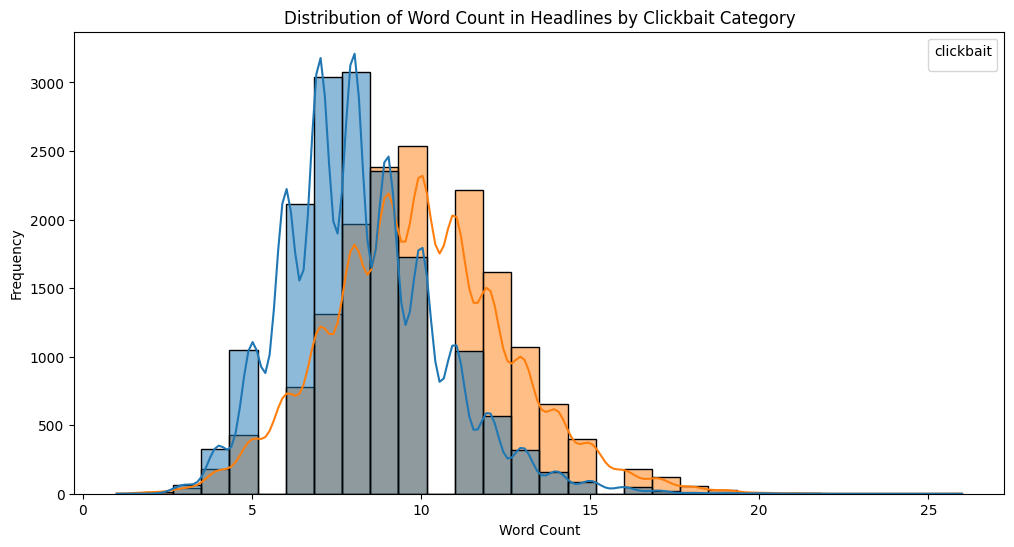

In [12]:
#Verifichiamo la distribuzione di parole  nella colonna hedline rispetto alla categoria "clickbait", nell'asse x mettiamo solo interi
def plot_word_count_distribution(df, column='headline', category_col='clickbait', bins=20):
    # Calcola il numero di parole in ogni headline
    df['word_count'] = df[column].apply(lambda x: len(str(x).split()))
    
    # Crea un grafico a barre della distribuzione del numero di parole
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='word_count', hue=category_col, bins=bins, kde=True)
    plt.title('Distribution of Word Count in Headlines by Clickbait Category')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend(title=category_col)
    plt.show()

plot_word_count_distribution(df, 'headline', 'clickbait', bins=30)


In [13]:
#Cancelliamo le righe che hanno word_count < 5
df = df[df['word_count'] > 5]

In [14]:
# contiamo per ogni headline il numero di punti esclamativi e interrogativi
def conta_punteggi(testo):
    if pd.isna(testo):
        return 0, 0
    punti_esclamativi = testo.count('!')
    punti_interrogativi = testo.count('?')
    return punti_esclamativi, punti_interrogativi
df[['punti_esclamativi', 'punti_interrogativi']] = df['headline'].apply(lambda x: pd.Series(conta_punteggi(x)))


In [15]:
df

,headline,clickbait,word_count,punti_esclamativi,punti_interrogativi
1,Which TV Female Friend Group Do You Belong In,1,9,0,0
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,14,0,0
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,12,0,0
4,A Couple Did A Stunning Photo Shoot With Their...,1,18,0,0
5,How To Flirt With Queer Girls Without Making A...,1,13,0,0
...,...,...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0,10,0,0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0,9,0,0
31997,Drone smartphone app to help heart attack vict...,0,12,0,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,9,0,0


In [16]:
# Cancelliamo le stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Calcoliamo per ogni headline il rapporto fra stop words e parole totali
def calcola_stopwords_ratio(testo):
    if pd.isna(testo):
        return 0
    parole = word_tokenize(testo)
    num_stopwords = sum(1 for parola in parole if parola.lower() in stop_words)
    return num_stopwords / len(parole) if len(parole) > 0 else 0
df['stopwords_ratio'] = df['headline'].apply(calcola_stopwords_ratio)

In [18]:
def rimuovi_stopwords(testo):
    parole = word_tokenize(testo)
    parole_filtrate = [parola for parola in parole if parola.lower() not in stop_words]
    return ' '.join(parole_filtrate)
df['headline'] = df['headline'].apply(rimuovi_stopwords)

In [19]:
# Contiamo il numero di caratteri in ogni headline
def conta_caratteri(testo):
    if pd.isna(testo):
        return 0
    return len(str(testo))
df['num_caratteri'] = df['headline'].apply(conta_caratteri)


In [20]:
df

,headline,clickbait,word_count,punti_esclamativi,punti_interrogativi,stopwords_ratio,num_caratteri
1,TV Female Friend Group Belong,1,9,0,0,0.444444,29
2,New `` Star Wars : Force Awakens '' Trailer Gi...,1,14,0,0,0.352941,55
3,Vine New York `` Celebrity Big Brother '' Fuck...,1,12,0,0,0.285714,57
4,Couple Stunning Photo Shoot Baby Learning Inop...,1,18,0,0,0.500000,64
5,Flirt Queer Girls Without Making Total Fool,1,13,0,0,0.461538,43
...,...,...,...,...,...,...,...
31995,"Make Female Hearts Flutter Iraq , Throw Shoe",0,10,0,0,0.272727,44
31996,"British Liberal Democrat Patsy Calton , 56 , d...",0,9,0,0,0.090909,56
31997,Drone smartphone app help heart attack victims...,0,12,0,0,0.166667,69
31998,"Netanyahu Urges Pope Benedict , Israel , Denou...",0,9,0,0,0.181818,54


In [21]:
# Troviamo parole maiuscole per ogni headline
def trova_maiuscole(testo):
    if pd.isna(testo):
        return 0
    parole = word_tokenize(testo)
    num_maiuscole = sum(1 for parola in parole if parola.isupper())
    return num_maiuscole
df['num_maiuscole'] = df['headline'].apply(trova_maiuscole)



In [22]:
# Funzione per calcolare la lunghezza media delle parole
def calcola_lunghezza_media_parole(testo):
    if pd.isna(testo):
        return 0
    parole = word_tokenize(testo)
    lunghezze = [len(parola) for parola in parole]
    return sum(lunghezze) / len(lunghezze) if len(lunghezze) > 0 else 0
df['lunghezza_media_parole'] = df['headline'].apply(calcola_lunghezza_media_parole)
# Funzione per calcolare la lunghezza media delle frasi
def calcola_lunghezza_media_frasi(testo):
    if pd.isna(testo):
        return 0
    frasi = testo.split('.')
    lunghezze = [len(frase.split()) for frase in frasi]
    return sum(lunghezze) / len(lunghezze) if len(lunghezze) > 0 else 0
df['lunghezza_media_frasi'] = df['headline'].apply(calcola_lunghezza_media_frasi)


In [23]:
df

,headline,clickbait,word_count,punti_esclamativi,punti_interrogativi,stopwords_ratio,num_caratteri,num_maiuscole,lunghezza_media_parole,lunghezza_media_frasi
1,TV Female Friend Group Belong,1,9,0,0,0.444444,29,1,5.000000,5.0
2,New `` Star Wars : Force Awakens '' Trailer Gi...,1,14,0,0,0.352941,55,0,4.090909,11.0
3,Vine New York `` Celebrity Big Brother '' Fuck...,1,12,0,0,0.285714,57,0,4.800000,10.0
4,Couple Stunning Photo Shoot Baby Learning Inop...,1,18,0,0,0.500000,64,0,6.222222,9.0
5,Flirt Queer Girls Without Making Total Fool,1,13,0,0,0.461538,43,0,5.285714,7.0
...,...,...,...,...,...,...,...,...,...,...
31995,"Make Female Hearts Flutter Iraq , Throw Shoe",0,10,0,0,0.272727,44,0,4.625000,8.0
31996,"British Liberal Democrat Patsy Calton , 56 , d...",0,9,0,0,0.090909,56,0,4.700000,10.0
31997,Drone smartphone app help heart attack victims...,0,12,0,0,0.166667,69,0,6.000000,10.0
31998,"Netanyahu Urges Pope Benedict , Israel , Denou...",0,9,0,0,0.181818,54,0,5.111111,9.0


In [24]:
# Cerchiamo Hashtags
def trova_hashtags(testo):
    if pd.isna(testo):
        return 0
    hashtags = [parola for parola in testo.split() if parola.startswith('#')]
    return len(hashtags)
df['num_hashtags'] = df['headline'].apply(trova_hashtags)
# Cerchiamo menzioni
def trova_menzioni(testo):
    if pd.isna(testo):
        return 0
    menzioni = [parola for parola in testo.split() if parola.startswith('@')]
    return len(menzioni)
df['num_menzioni'] = df['headline'].apply(trova_menzioni)
# Cerchiamo link
def trova_link(testo):
    if pd.isna(testo):
        return 0
    link = [parola for parola in testo.split() if parola.startswith('http')]
    return len(link)
df['num_link'] = df['headline'].apply(trova_link)
# Cerchiamo emoji
def trova_emoji(testo):
    if pd.isna(testo):
        return 0
    emoji = [parola for parola in testo.split() if any(char in parola for char in ['😀', '😂', '😍', '😢', '😡'])]
    return len(emoji)
df['num_emoji'] = df['headline'].apply(trova_emoji)
# Cerchiamo numeri
def trova_numeri(testo):
    if pd.isna(testo):
        return 0
    numeri = [parola for parola in testo.split() if parola.isdigit()]
    return len(numeri)
df['num_numeri'] = df['headline'].apply(trova_numeri)
# Cerchiamo titoli che finiscono "..."
def trova_titoli_che_finiscono_con(testo, carattere='...'):
    if pd.isna(testo):
        return 0
    return 1 if testo.endswith(carattere) else 0
df['titolo_finisce_con_3punti'] = df['headline'].apply(trova_titoli_che_finiscono_con)
# Cerchiamo titoli che iniziano con "..."
def trova_titoli_che_iniziano_con(testo, carattere='...'):
    if pd.isna(testo):
        return 0
    return 1 if testo.startswith(carattere) else 0
df['titolo_inizia_con_3punti'] = df['headline'].apply(trova_titoli_che_iniziano_con)


In [25]:
df

,headline,clickbait,word_count,punti_esclamativi,punti_interrogativi,stopwords_ratio,num_caratteri,num_maiuscole,lunghezza_media_parole,lunghezza_media_frasi,num_hashtags,num_menzioni,num_link,num_emoji,num_numeri,titolo_finisce_con_3punti,titolo_inizia_con_3punti
1,TV Female Friend Group Belong,1,9,0,0,0.444444,29,1,5.000000,5.0,0,0,0,0,0,0,0
2,New `` Star Wars : Force Awakens '' Trailer Gi...,1,14,0,0,0.352941,55,0,4.090909,11.0,0,0,0,0,0,0,0
3,Vine New York `` Celebrity Big Brother '' Fuck...,1,12,0,0,0.285714,57,0,4.800000,10.0,0,0,0,0,0,0,0
4,Couple Stunning Photo Shoot Baby Learning Inop...,1,18,0,0,0.500000,64,0,6.222222,9.0,0,0,0,0,0,0,0
5,Flirt Queer Girls Without Making Total Fool,1,13,0,0,0.461538,43,0,5.285714,7.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,"Make Female Hearts Flutter Iraq , Throw Shoe",0,10,0,0,0.272727,44,0,4.625000,8.0,0,0,0,0,0,0,0
31996,"British Liberal Democrat Patsy Calton , 56 , d...",0,9,0,0,0.090909,56,0,4.700000,10.0,0,0,0,0,1,0,0
31997,Drone smartphone app help heart attack victims...,0,12,0,0,0.166667,69,0,6.000000,10.0,0,0,0,0,0,0,0
31998,"Netanyahu Urges Pope Benedict , Israel , Denou...",0,9,0,0,0.181818,54,0,5.111111,9.0,0,0,0,0,0,0,0


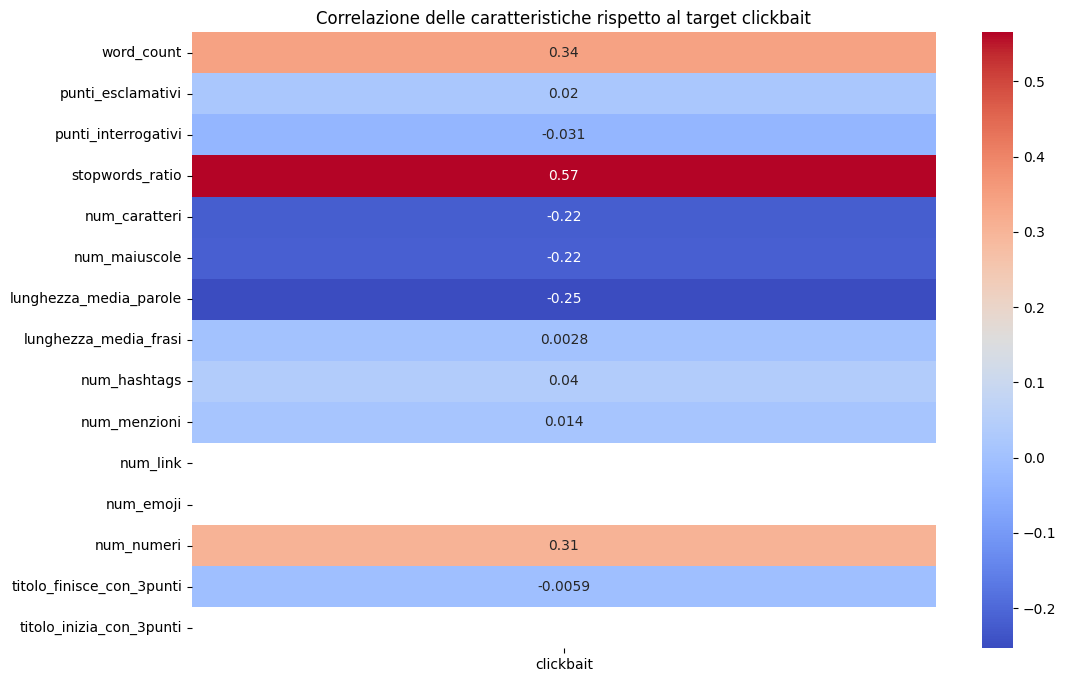

In [26]:
# Correlazione rispetto al target clickbait
#droppiamo headline
df_cpy = df.copy()
df_cpy.drop(columns=['headline'], inplace=True)
correlazione = df_cpy.corr()['clickbait'].drop('clickbait')
plt.figure(figsize=(12, 8))
sns.heatmap(correlazione.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlazione delle caratteristiche rispetto al target clickbait')
plt.show()

In [27]:
#Droppiamo num_link e num_emoji
df.drop(columns=['num_link', 'num_emoji'], inplace=True)

In [28]:
df

,headline,clickbait,word_count,punti_esclamativi,punti_interrogativi,stopwords_ratio,num_caratteri,num_maiuscole,lunghezza_media_parole,lunghezza_media_frasi,num_hashtags,num_menzioni,num_numeri,titolo_finisce_con_3punti,titolo_inizia_con_3punti
1,TV Female Friend Group Belong,1,9,0,0,0.444444,29,1,5.000000,5.0,0,0,0,0,0
2,New `` Star Wars : Force Awakens '' Trailer Gi...,1,14,0,0,0.352941,55,0,4.090909,11.0,0,0,0,0,0
3,Vine New York `` Celebrity Big Brother '' Fuck...,1,12,0,0,0.285714,57,0,4.800000,10.0,0,0,0,0,0
4,Couple Stunning Photo Shoot Baby Learning Inop...,1,18,0,0,0.500000,64,0,6.222222,9.0,0,0,0,0,0
5,Flirt Queer Girls Without Making Total Fool,1,13,0,0,0.461538,43,0,5.285714,7.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,"Make Female Hearts Flutter Iraq , Throw Shoe",0,10,0,0,0.272727,44,0,4.625000,8.0,0,0,0,0,0
31996,"British Liberal Democrat Patsy Calton , 56 , d...",0,9,0,0,0.090909,56,0,4.700000,10.0,0,0,1,0,0
31997,Drone smartphone app help heart attack victims...,0,12,0,0,0.166667,69,0,6.000000,10.0,0,0,0,0,0
31998,"Netanyahu Urges Pope Benedict , Israel , Denou...",0,9,0,0,0.181818,54,0,5.111111,9.0,0,0,0,0,0


In [ ]:

# Sogliamo sul modulo della  correlazione
#Droppiamo headline
df_cpy = df.copy()
df_cpy.drop(columns=['headline'], inplace=True)
def soglia_correlazione(df, soglia=0.1):
    """
    Filtra le colonne del DataFrame in base alla soglia di correlazione con la colonna 'clickbait'.
    
    Parametri:
    - df: DataFrame pandas
    - soglia: Soglia di correlazione (default 0.1)
    
    Ritorna:
    - DataFrame filtrato
    """
    correlazione = df.corr()['clickbait'].drop('clickbait')
    colonne_filtrate = correlazione[correlazione.abs() > soglia].index.tolist()
    return colonne_filtrate
columns = soglia_correlazione(df_cpy, soglia=0.1)



In [32]:
columns

['word_count',
 'stopwords_ratio',
 'num_caratteri',
 'num_maiuscole',
 'lunghezza_media_parole',
 'num_numeri']